# Inverse Compton Scattering

At the low energy limit, Tracy calculated an approximate expression for dN/(dt deps1), which is the number of photons per scattered energy eps1 per unit time. This expression is presented as an integrand, integrated over the CMB spectrum.

In [11]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [94]:
%autoreload
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from scipy import interpolate

matplotlib.rcParams['figure.figsize'] = [10,10]

import numpy as np
import pickle

from astropy.io import fits

import darkhistory.physics as phys
import darkhistory.spec.spectrum as spec
import darkhistory.spec.transferfunction as tf

In [95]:
nonrel_ICS_table = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/ICS_nonrel_new.raw","rb"))
nonrel_ICS_table = np.array(nonrel_ICS_table, dtype='float64')

In [96]:
Emax = 1e10
Emin = 1e-8
nEe = 500
nEp  = 500

dlnEp = np.log(Emax/Emin)/nEp
lowengEp = Emin*np.exp((np.arange(nEp)+0.5)*dlnEp)        

dlnEe = np.log(Emax/Emin)/nEe
lowengEe = phys.me + Emin*np.exp((np.arange(nEe)+0.5)*dlnEe)

In [97]:
nonrel_ICS = tf.TransFuncAtRedshift(
    [spec.Spectrum(lowengEp, ICS_array, 1000) for ICS_array in nonrel_ICS_table],
    in_eng=lowengEe, dlnz=1
)

In [98]:
file_name = "/Users/hongwan/Dropbox (MIT)/Photon Deposition/thomsontable.fits"
file = fits.open(file_name)

In [99]:
lowengEp_file = file[1].data[0][0]
lowengEe_file = file[1].data[0][1]
nonrelspec_file = np.array(file[1].data[0][2])
nonrel_ICS_file = tf.TransFuncAtRedshift(
    [spec.Spectrum(lowengEp_file, ICS_array, 1000) for ICS_array in nonrelspec_file],
    in_eng=lowengEe_file, dlnz=1
)

[0.0001, 1000000000000.0, 1e-18, 1]

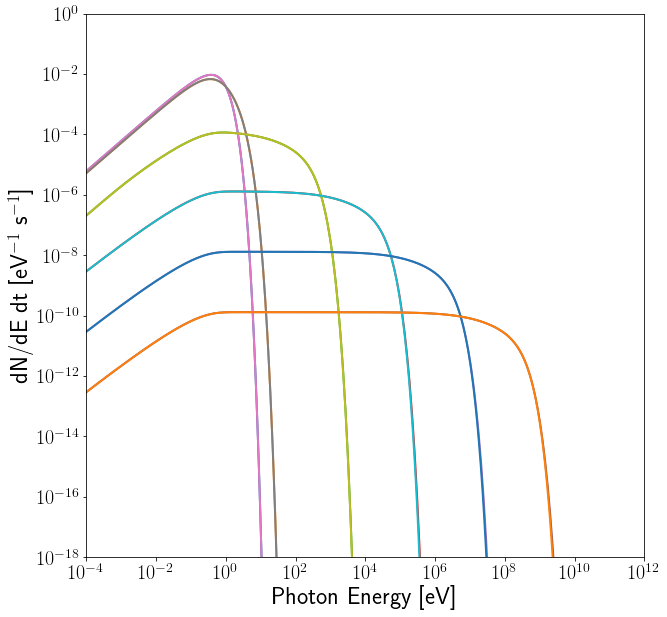

In [100]:
ax = plt.subplot(1,1,1)
plt.rc('text', usetex=True)

comp_elec_eng = np.array([phys.me + 2e-8, 6e5, 6e6, 6e7, 6e8, 6e9])

nonrel_ICS.plot(ax, ind=comp_elec_eng, indtype='in_eng', linewidth=2)
nonrel_ICS_file.plot(ax, ind=comp_elec_eng, indtype='in_eng', linewidth=2)

ax.set_xscale('log')
ax.set_yscale('log')

plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlabel('Photon Energy [eV]',fontsize=24)

plt.ylabel('dN/dE dt [eV$^{-1}$ s$^{-1}$]',fontsize=24)
plt.axis([1e-4, 1e12, 1e-18, 1])
